## Analisis de Regresion Lineal

#### Importamos librerias 


In [529]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [530]:
# Creamos una lista de las columnas en comun
col_comunes=['name','year','selling_price','km_driven','fuel','seller_type','transmission','owner']

In [531]:
# Creamos una lista de los dataframes 
archivos_csv=["CAR DETAILS FROM CAR DEKHO.csv","Car details v3.csv","car details v4.csv"]

In [532]:
#lista vacia para almacenar nuevos dataframes
dataframes=[]

In [533]:
#Creamos ciclo for para leer todos los archivos 
for archivo in archivos_csv:
    df_archivos = pd.read_csv(archivo, usecols=col_comunes)
    dataframes.append(df_archivos)

In [534]:
#combinamos todos los dataframes
df = pd.concat(dataframes, ignore_index=True)

In [535]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14527 entries, 0 to 14526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           14527 non-null  object
 1   year           14527 non-null  int64 
 2   selling_price  14527 non-null  int64 
 3   km_driven      14527 non-null  int64 
 4   fuel           14527 non-null  object
 5   seller_type    14527 non-null  object
 6   transmission   14527 non-null  object
 7   owner          14527 non-null  object
dtypes: int64(3), object(5)
memory usage: 908.1+ KB


In [537]:
df.describe()


,year,selling_price,km_driven
count,14527.000000,1.452700e+04,1.452700e+04
mean,2013.962484,7.491048e+05,6.653254e+04
std,4.142749,1.202948e+06,5.415532e+04
min,1983.000000,2.000000e+04,0.000000e+00
25%,2012.000000,2.500000e+05,3.386400e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,7.250000e+05,9.000000e+04
max,2022.000000,3.500000e+07,2.360457e+06


##### limpieza de datos

In [538]:

df['owner'] = df['owner'].str.strip()
df['owner'] = df['owner'].str.title()
owner_correcciones = {
    'First Owner': '1st Owner',
    '1St Owner': '1st Owner',
    'First': '1st Owner',
    'Second Owner': '2nd Owner',
    '2Nd Owner': '2nd Owner',
    'Second': '2nd Owner',
    'Third Owner': '3rd Owner',
    '3Rd Owner': '3rd Owner',
    'Third': '3rd Owner',
    'Fourth & Above Owner': '4th Owner or More',
    'Fourth': '4th Owner or More',
    '4Th Owner Or More': '4th Owner or More',
    '4 Or More': '4th Owner or More'
}
df['owner'] = df['owner'].replace(owner_correcciones)
print(df['owner'].value_counts())


owner
1st Owner            9740
2nd Owner            3584
3rd Owner             901
4th Owner or More     259
Test Drive Car         22
Unregistered Car       21
Name: count, dtype: int64


In [539]:

df['fuel'] = df['fuel'].str.strip()
df['fuel'] = df['fuel'].str.title()
fuel_correcciones = {
    'Petrol': 'Petrol',
    'Diesel': 'Diesel',
    'Cng': 'CNG',
    'Cng + Cng': 'CNG',
    'Lpg': 'LPG',
    'Petrol + Cng': 'Hybrid',
    'Petrol + Lpg': 'Hybrid'
}
df['fuel'] = df['fuel'].replace(fuel_correcciones)
print(df['fuel'].value_counts())


fuel
Diesel      7604
Petrol      6696
CNG          148
LPG           66
Electric       8
Hybrid         5
Name: count, dtype: int64


In [540]:
df['selling_price']=pd.to_numeric(df['selling_price'],errors='coerce')

#### Mapa de Calor 

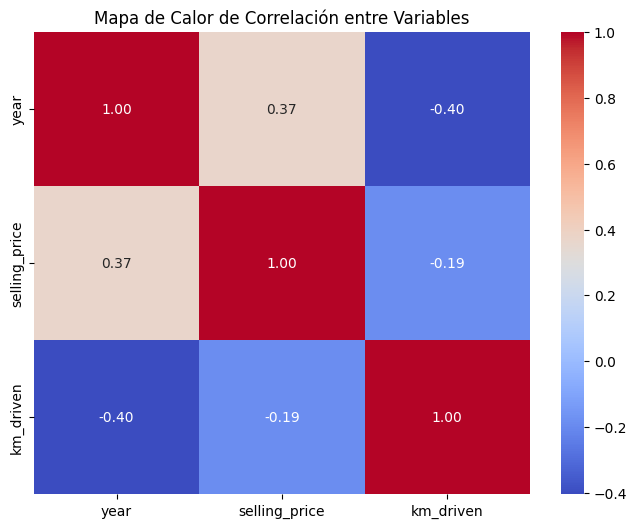

In [541]:

mapa_calor = df[['year', 'selling_price', 'km_driven']]

# Calcular la matriz de correlación
correlation_matrix = mapa_calor.corr()

# Crear la gráfica de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


#### Calculo de regresion lineal con una sola vaiable 

In [542]:
# Selling_price es la variable dependiente y las demas son independientes
y=df[['selling_price']]
x=df[['year']]

In [543]:
#Eliminar Valores Nulls
df = df.dropna()

In [544]:
modelo= LinearRegression()

In [545]:
modelo.fit(x,y)

LinearRegression()

In [546]:
beta_0=modelo.intercept_
beta_1=modelo.coef_


In [547]:
print(f"Intercepto en B0: {beta_0}")
print(f"Coeficiente en B1: {beta_1}")

Intercepto en B0: [-2.13140238e+08]
Coeficiente en B1: [[106203.24070073]]


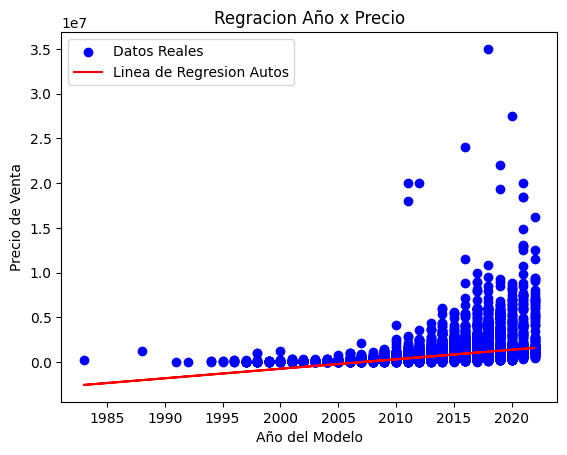

In [548]:
plt.scatter(df['year'],y,color='blue',label='Datos Reales')
plt.plot(df['year'],modelo.predict(x),color='red',label='Linea de Regresion Autos')
plt.title('Regracion Año x Precio')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

In [549]:
#Evaluaciono del modelo
r2_score = modelo.score(x, y)
print("R^2 Score del modelo: ", r2_score)


R^2 Score del modelo:  0.13377017646515876


In [550]:

data_agupada = df.groupby('year').agg({'selling_price': 'mean'}).reset_index()

X = data_agupada[['year']]
y = data_agupada['selling_price']


Para este analisis entre el año de fabricación y el precio de venta de los automóviles nos permitió comprender mejor cómo se relacionan estos dos factores. Descubrimos que el año de fabricación tiene cierta influencia en el precio, pero no es el único elemento importante. De hecho, el modelo mostró que solo una parte del precio puede explicarse con esta variable, lo cual sugiere que hay muchos otros factores que afectan el valor de un coche, como su estado, kilometraje y el número de propietarios que es el analisis que vamos hacer en el siguiente modelo donde vamos a incluir otra variable.

Al dividir los datos en entrenamiento y prueba, entendimos la importancia de validar el modelo antes de usarlo. . Aunque la línea de regresión mostró una tendencia general de que los autos más nuevos cuestan más, quedó claro que hay bastante variabilidad que el modelo no puede explicar.

##### Si quisieramos un analisis mas general agupamos y sacamos un precio promedio por año y poder ver el modelo

In [551]:
data_agupada = df.groupby('year').agg({'selling_price': 'mean'}).reset_index()

In [552]:
X = data_agupada[['year']]
y = data_agupada['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [553]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [554]:
# Obtener intercepto y coeficiente
beta_0 = modelo.intercept_
beta_1 = modelo.coef_
print(f"Intercepto en B0: {beta_0}")
print(f"Coeficiente en B1: {beta_1}")

Intercepto en B0: -86345555.38915245
Coeficiente en B1: [43355.08638089]


In [555]:

# Predecir los precios para el conjunto de prueba
y_pred = modelo.predict(X_test)

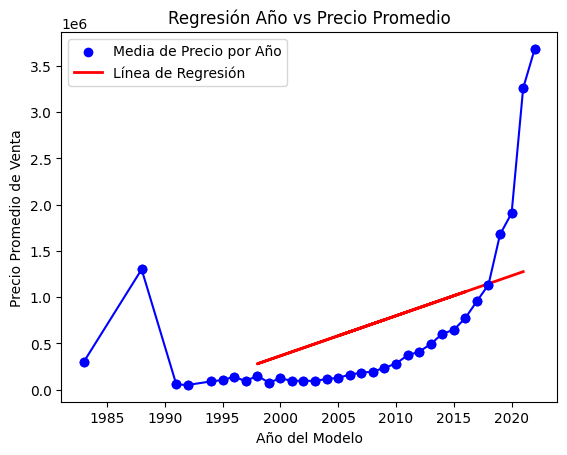

In [556]:

# Graficar los resultados del agrupamiento y la regresión
plt.scatter(X, y, color='blue', label='Media de Precio por Año')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.plot(data_agupada['year'], data_agupada['selling_price'], marker='o', color='b')
plt.title('Regresión Año vs Precio Promedio')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio Promedio de Venta')
plt.legend()
plt.show()


In [557]:
# Evaluar el rendimiento del modelo
r2_score = modelo.score(X_test, y_test)
print("R^2 Score del modelo: ", r2_score)

R^2 Score del modelo:  0.40319941162947603


In [558]:
# Para medir otra variable la agregamos al modelo 
X = df[['year', 'km_driven']]
y = df[['selling_price']]

In [559]:
# Crear y entrenar el modelo de regresión lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [560]:
# Obtener el intercepto y los coeficientes
beta_0 = modelo.intercept_[0]  
beta_1 = modelo.coef_[0][0]    
beta_2 = modelo.coef_[0][1]    

# Mostrar el intercepto y los coeficientes
print(f"Intercepto en B0: {beta_0}")
print(f"Coeficiente B1 (Año del Modelo): {beta_1}")
print(f"Coeficiente B2 (Kilometraje): {beta_2}")


Intercepto en B0: -206589347.39531195
Coeficiente B1 (Año del Modelo): 102982.45097819493
Coeficiente B2 (Kilometraje): -0.941886668765971


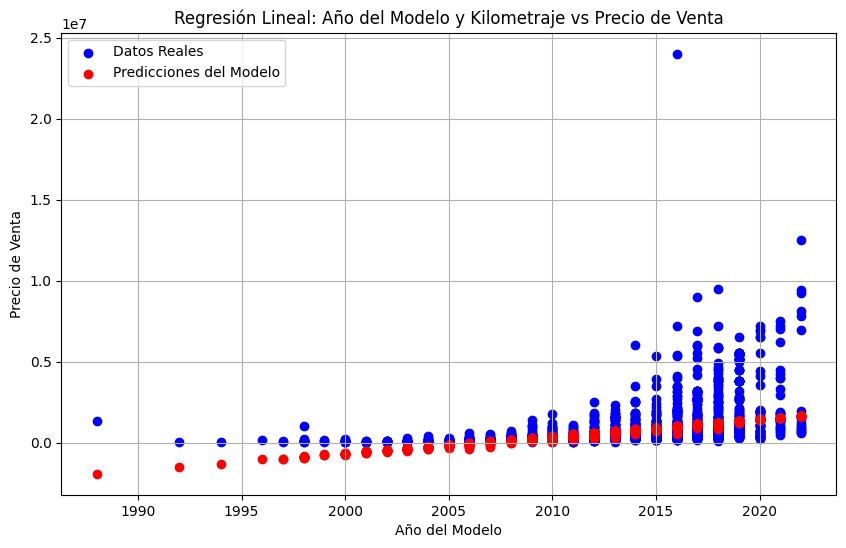

In [561]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['year'], y_test, color='blue', label='Datos Reales')
plt.scatter(X_test['year'], modelo.predict(X_test), color='red', label='Predicciones del Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio de Venta')
plt.title('Regresión Lineal: Año del Modelo y Kilometraje vs Precio de Venta')
plt.legend()
plt.grid(True)
plt.show()

In [562]:
# Evaluar el rendimiento del modelo
r2_score = modelo.score(X_test, y_test)
print("R^2 Score del modelo: ", r2_score)

R^2 Score del modelo:  0.14257312219673723


In [563]:

# Definir nuevos valores para 'year' y 'km_driven' para realizar predicciones
nuevo_x = np.array([[2021, 25000], [2022, 130000]])  # Año y kilometraje

# Realizar las predicciones con el modelo entrenado
predicciones = modelo.predict(nuevo_x)

# Mostrar las predicciones de forma clara
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año del Modelo: {nuevo_x[i][0]}, Kilometraje: {nuevo_x[i][1]} km): {pred[0]:.2f} USD")



Predicciones:
Predicción 1 para (Año del Modelo: 2021, Kilometraje: 25000 km): 1514638.86 USD
Predicción 2 para (Año del Modelo: 2022, Kilometraje: 130000 km): 1518723.22 USD


c:\Users\cesarcastillo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [564]:
# Evaluar el rendimiento del modelo
r2_score = modelo.score(X_test, y_test)
print("R^2 Score del modelo: ", r2_score)

R^2 Score del modelo:  0.14257312219673723
